In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
agro = pd.read_csv('AGROPHOS.csv')
agro.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,31.75,31.90,31.00,31.549999,31.173386,36000
1,2018-01-02,31.85,31.85,31.65,31.700001,31.321596,42000
2,2018-01-03,31.65,31.65,31.25,31.250000,30.876968,48000
3,2018-01-04,31.60,31.60,31.60,31.600000,31.222790,6000
4,2018-01-05,31.75,31.90,31.75,31.799999,31.420401,24000


# KNN


In [52]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
train_data = agro[:int(len(agro)*0.717)]
test_data = agro[int(len(agro)*0.717):]

X_train = train_data[['Low', 'High', 'Volume']]
y_train = train_data[['Date', 'Close']]

X_test = test_data[['Low', 'High', 'Volume']]
y_test = test_data[['Date', 'Close']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình KNN Regressor
knn = KNeighborsRegressor()

# Định nghĩa các tham số cần tìm kiếm
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 5, 10, 15, 20, 25, 30],
    'metric': ['euclidean', 'manhattan']
}

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train['Close'])

# Lấy mô hình tốt nhất
best_knn = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_) #Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 7, 'weights': 'uniform'}

# Dự đoán giá trị Close từ tập kiểm tra
y_pred = best_knn.predict(X_test_scaled)

# # Create the KNN Regressor model
# knn = KNeighborsRegressor(
#     n_neighbors=5,
#     weights='distance',
#     leaf_size=15,
#     metric='manhattan'
# )

# # Fit the model
# knn.fit(X_train_scaled, y_train['Close'])

# # Predict using the model
# y_pred = knn.predict(X_test_scaled)

# Đánh giá mô hình
mse = mean_squared_error(y_test['Close'], y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test['Close'], y_pred)
print(f'R-squared: {r2}')


Root Mean Squared Error: 4.224111824473684
R-squared: 0.7186948478172881


C:\Users\Pisco\AppData\Local\Temp\ipykernel_3840\3224050537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Date'] = pd.to_datetime(y_test['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_3840\3224050537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_Close'] = y_pred


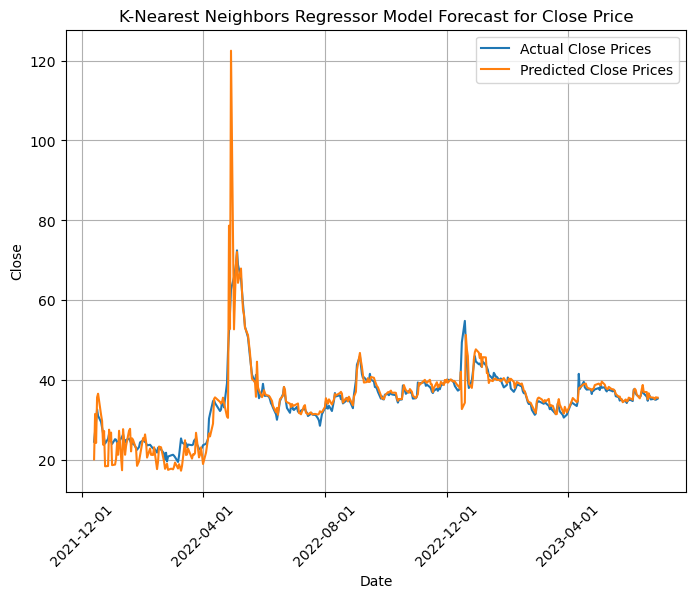

In [59]:
# Convert Date to datetime format
y_test['Date'] = pd.to_datetime(y_test['Date'])

# Add the 'Predicted_Close' column to y_test
y_test['Predicted_Close'] = y_pred

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the actual and predicted close prices
plt.plot(y_test['Date'], y_test['Close'], label='Actual Close Prices')
plt.plot(y_test['Date'], y_test['Predicted_Close'], label='Predicted Close Prices')

# Set title and labels
plt.title('K-Nearest Neighbors Regressor Model Forecast for Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Format x-axis to show every two months
plt.xticks(pd.date_range(start=y_test['Date'].min(), end=y_test['Date'].max(), freq='4M').strftime('%Y-%m'), rotation=45)

# Add grid and legend
plt.legend()
plt.grid()

# Show plot
plt.show()


# MLPR


C:\Users\Pisco\AppData\Local\Temp\ipykernel_29992\2052235222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Date'] = pd.to_datetime(y_test['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_29992\2052235222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_Close'] = y_pred


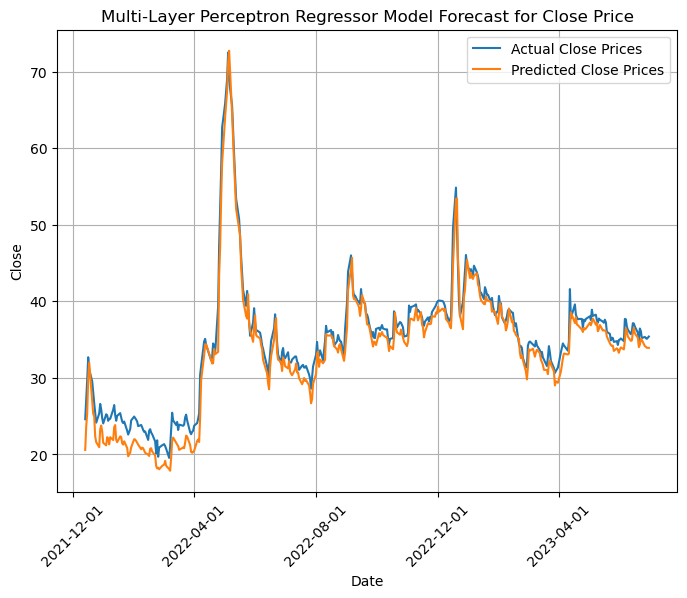

In [ ]:
# Convert Date to datetime format
y_test['Date'] = pd.to_datetime(y_test['Date'])

# Add the 'Predicted_Close' column to y_test
y_test['Predicted_Close'] = y_pred

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the actual and predicted close prices
plt.plot(y_test['Date'], y_test['Close'], label='Actual Close Prices')
plt.plot(y_test['Date'], y_test['Predicted_Close'], label='Predicted Close Prices')

# Set title and labels
plt.title('Multi-Layer Perceptron Regressor Model Forecast for Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Format x-axis to show every two months
plt.xticks(pd.date_range(start=y_test['Date'].min(), end=y_test['Date'].max(), freq='4M').strftime('%Y-%m'), rotation=45)

# Add grid and legend
plt.legend()
plt.grid()

# Show plot
plt.show()


# LSTM


In [ ]:
train_data = agro[:int(len(agro)*0.75)]
test_data = agro[int(len(agro)*0.75):]

X_train = train_data[['Open', 'Low', 'High']]
y_train = train_data[['Date', 'Close']]

X_test = test_data[['Open', 'Low', 'High']]
y_test = test_data[['Date', 'Close']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(25, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))
model.add(LSTM(25))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train_scaled, y_train['Close'], epochs=37, batch_size=32, verbose=1)

# Predict using the model
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
mse = mean_squared_error(y_test['Close'], y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test['Close'], y_pred)
print(f'R-squared: {r2}')


c:\Users\Pisco\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 2604.6504
Epoch 2/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2567.5615
Epoch 3/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2455.3875
Epoch 4/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2366.0247
Epoch 5/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2004.1205
Epoch 6/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1788.1074
Epoch 7/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1543.2522
Epoch 8/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1271.2905
Epoch 9/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1160.5872
Epoch 10/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 843.7611
Epoch 11/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 708.6680
Epoch 12/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 703.1664
Epoch 13/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 550.5751
Epoch 14/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 462.3397
Epoch 15/37
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/s

C:\Users\Pisco\AppData\Local\Temp\ipykernel_36352\1094290340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Date'] = pd.to_datetime(y_test['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_36352\1094290340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Date'] = pd.to_datetime(y_train['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_36352\1094290340.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

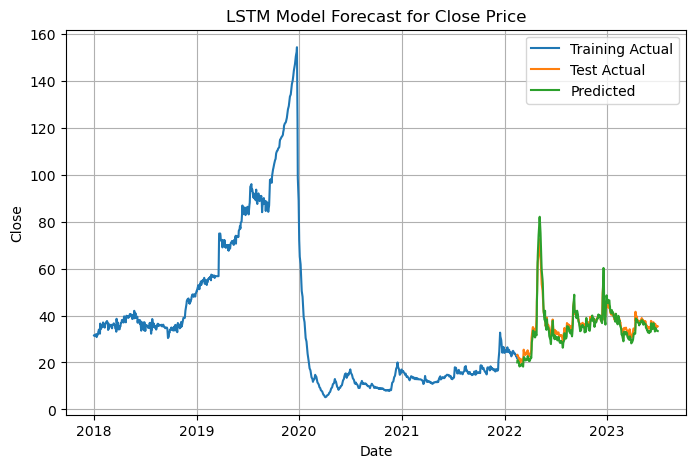

In [ ]:
from matplotlib.dates import DateFormatter, YearLocator

# Convert Date to datetime format
y_test['Date'] = pd.to_datetime(y_test['Date'])
y_train['Date'] = pd.to_datetime(y_train['Date'])

# Add the 'Predicted_Close' column to y_test
y_test['Predicted_Close'] = y_pred

# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the actual and predicted close prices
plt.plot(y_train['Date'], y_train['Close'], label='Training Actual')
plt.plot(y_test['Date'], y_test['Close'], label='Test Actual')
plt.plot(y_test['Date'], y_test['Predicted_Close'], label='Predicted')

# Set title and labels
plt.title('LSTM Model Forecast for Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Format x-axis to show every 2 years
plt.gca().xaxis.set_major_locator(YearLocator(1))
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

# Add grid and legend
plt.legend()
plt.grid()

# Show plot
plt.show()


# SVR


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_data = agro.loc[:int(len(agro)*0.717)]
test_data =  agro.loc[int(len(agro)*0.717):]

X_train = train_data[['Open', 'High', 'Low', 'Volume']]
y_train = train_data[['Date', 'Close']]

X_test = test_data[['Open', 'High', 'Low', 'Volume']]
y_test = test_data[['Date', 'Close']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001],
              'epsilon': [0.01, 0.1, 1]}

# Create the SVR model
svr = SVR(kernel='rbf')

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error') # You might want to change scoring based on your needs
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_svr = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_) #Best Hyperparameters: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.01}

# Predict using the best model
y_pred = best_svr.predict(X_test_scaled)

In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(y_test['Close'], y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test['Close'], y_pred)
print(f'R-squared: {r2}')


Root Mean Squared Error: 1.8406001502917777
R-squared: 0.9465896062897405


C:\Users\Pisco\AppData\Local\Temp\ipykernel_44960\3976932391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Date'] = pd.to_datetime(y_test['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_44960\3976932391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_Close'] = y_pred


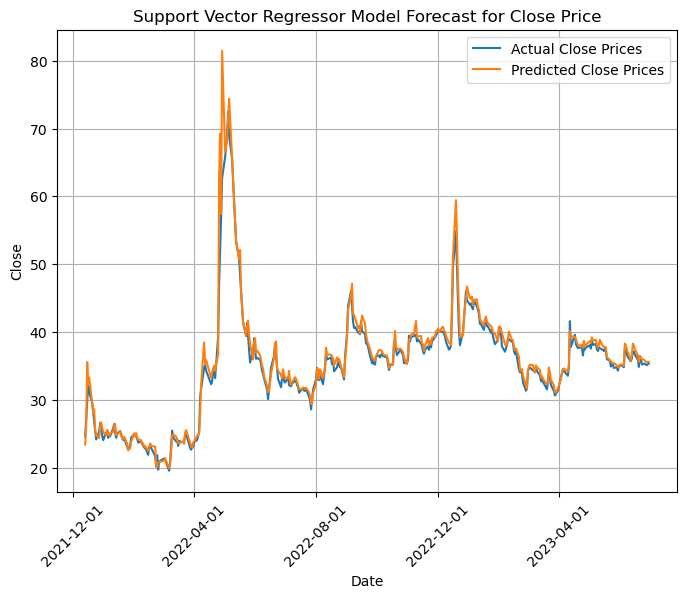

In [ ]:

# Convert Date to datetime format
y_test['Date'] = pd.to_datetime(y_test['Date'])

# Add the 'Predicted_Close' column to y_test
y_test['Predicted_Close'] = y_pred

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the actual and predicted close prices
plt.plot(y_test['Date'], y_test['Close'], label='Actual Close Prices')
plt.plot(y_test['Date'], y_test['Predicted_Close'], label='Predicted Close Prices')

# Set title and labels
plt.title('Support Vector Regressor Model Forecast for Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Format x-axis to show every two months
plt.xticks(pd.date_range(start=y_test['Date'].min(), end=y_test['Date'].max(), freq='4M').strftime('%Y-%m'), rotation=45)

# Add grid and legend
plt.legend()
plt.grid()

# Show plot
plt.show()
